# ObsID : 0945070133, SRCNUM : 10, Instru : Combined
**Simbad :** Star *2MASS J03332989-2714334* (https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4013058032&Name=2MASS%20J03332989-2714334&submit=submit).

## ESASky
https://sky.esa.int/esasky/?target=53.37579166666667%20-27.242833333333333&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033329.9-271434
- IAU name : 4XMM J033329.9-271433
- RA : 03h 33m 29.959s
- DEC : -27° 14' 34.10"

``GAIA``
- Designation : Gaia DR3 5060545834987968640
- RA : 03h 33m 29.937s
- DEC : -27° 14' 33.44"
- Parallax : 1.9836 mas
- G : 17.5984
- G_BP - G_RP = 2.4856
- Effective temperature: T_eff = 3500 K


``2MASS``
- Name : 03332989-2714334
- RA : 03h 33m 29.898s
- DEC : -27° 14' 33.48"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


The expected reduce Chi-squared value of a perfect fit is **≈ 1** with: ``reduce Chi-squared = Chi-squared/(n_bins-n_parameters)``.

## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*spectrum_combined_grp_chi.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945070133_SRCNUM10_source_spectrum_combined_grp_chi.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.162e-02 +/- 1.643e-03 (58.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-7
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 8255 sec
 Using fit statistic: chi
 Using Background File                ObsID0945070133_SRCNUM10_background_spectrum_combined.fits
  Background Exposure Time: 8256 sec
 Using Response (RMF) File            ObsID0945070133_SRCNUM10_response_combined.rmf for Source 1



In [4]:
print(f"Number of counts = {1.162e-02*8255} cts")

Number of counts = 95.9231 cts


The number of counts is lower than 100 cts, indicating that the C statistic should be a better choice than Chi-squared as a fit statistic.

## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.000001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     1 channels (1) ignored in spectrum #     1
     1 channels (7) ignored in spectrum #     1



(-0.5, 854.5, 656.5, -0.5)

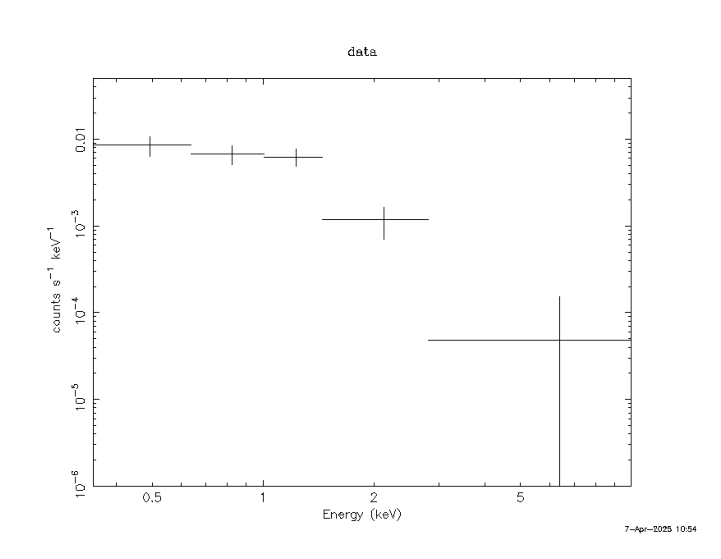

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
There are 3 parameters in the ``tbabs*bbody`` model. Here, Chi-squared = 1.8143 using 5 bins, so the **reduce Chi-squared = 0.907**. The value is close to 1 meaning it is a good fit.

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              2.506807e+12     using 5 bins.

Tes

(-0.5, 852.5, 655.5, -0.5)

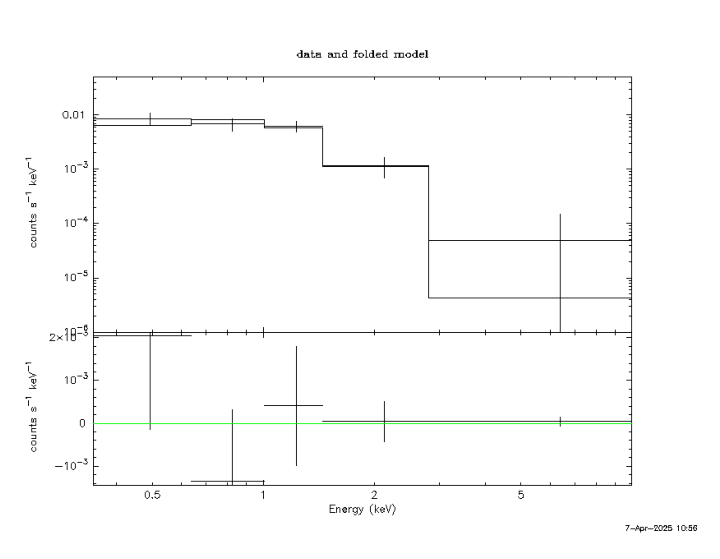

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
There are 3 parameters in the ``tbabs*bremss`` model. Here, Chi-squared = 1.1526 using 5 bins, so the **reduce Chi-squared = 0.5763**. The value is close to 1 meaning it is a good fit.

Lowest Chi-Squared value.

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.546423e+10     using 5 bins.

Test statistic : Chi-Squared              7.546423e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
35.9347      1.78433      -3     0.0888132       53.6102   5.88573e-06
32.045       475602       -1     0.0343867       10.3821   4.02566e-06
22.5514      861671       -2    0.00819711      0.972990   7.72211e-06
3.4

(-0.5, 851.5, 656.5, -0.5)

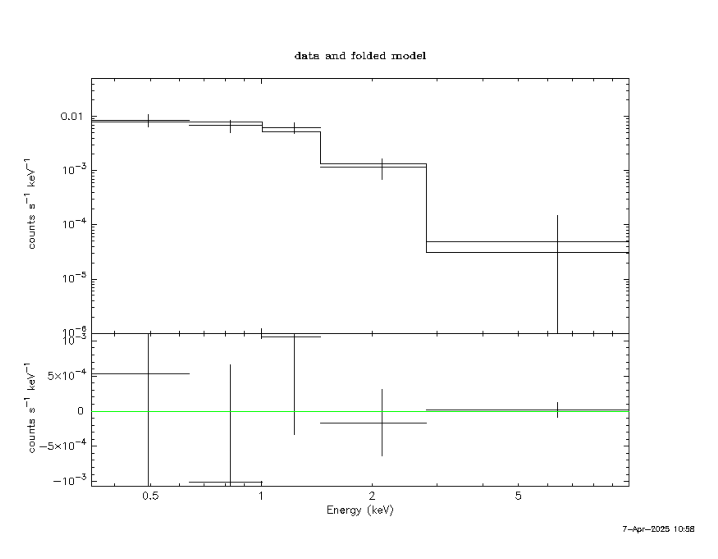

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model
There are 4 parameters in the ``tbabs*apec`` model. Here, Chi-squared = 13.2760 using 5 bins, so the **reduce Chi-squared = 13.2760**. The value is far from 1 meaning it is a bad fit.

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.115648e+10     using 5 bins.

Test statistic : Chi-Squared              1.115648e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
14.0164      5.58003      -3      0.688464      0.799605   3.7

(-0.5, 855.5, 657.5, -0.5)

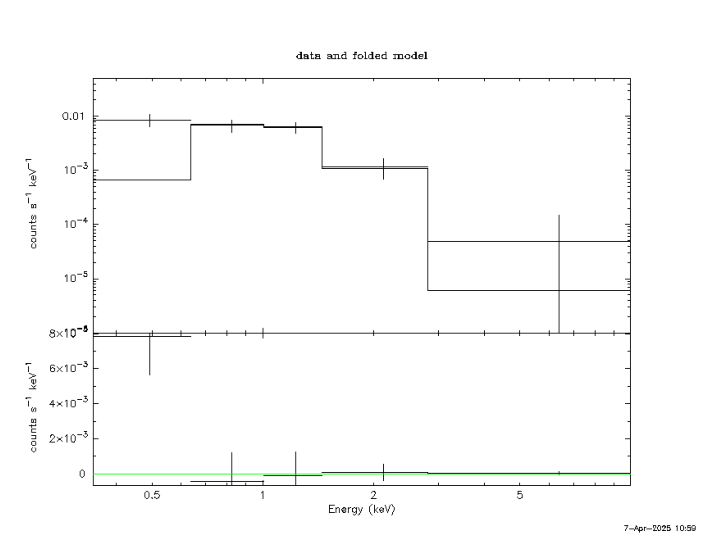

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
There are 3 parameters in the ``tbabs*powerlaw`` model. Here, Chi-squared = 1.1882 using 5 bins, so the **reduce Chi-squared = 0.5941**. The value is close to 1 meaning it is a good fit.

Second lowest Chi-Squared value.

In [13]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.130994e+11     using 5 bins.

Test statistic : Chi-Squared              5.130994e+11     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
44.6861      1.53202       0      0.371590       1.24221   3.08996e-06
43.1663      496546       -1      0.156360       1.71105   2.18494e-06
31.3241      1.02287e+06  -1     0.0169944       3.21853   7.95068e-06
3

(-0.5, 852.5, 655.5, -0.5)

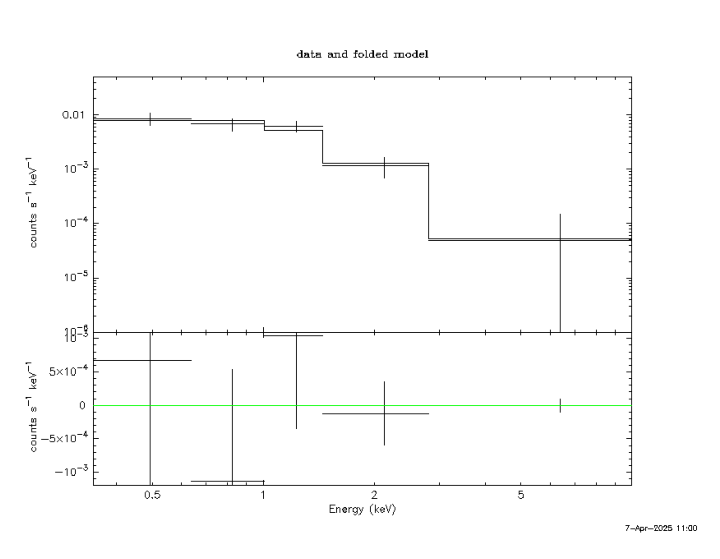

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model
There are 5 parameters in the ``tbabs*(bbody+powerlaw)`` model. Here, Chi-squared = 1.1923 using 5 bins. The reduce Chi-squared cannot be calculated meaning the model has no statistical significance.

In [15]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.118474e+12     using 5 bins.

Test statistic : Chi-Squared              5.118474e+12     using 5 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
47.2802      193356        0     0.0647961      

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 852.5, 654.5, -0.5)

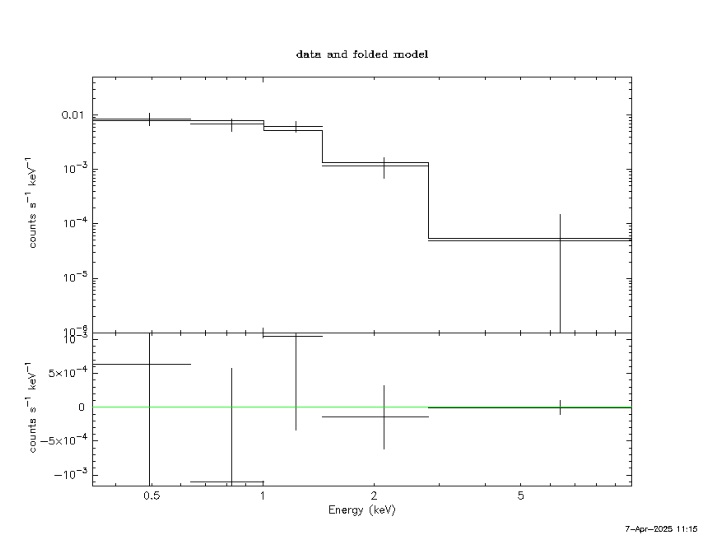

In [16]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_Spectrum_bbodypowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremss + Powerlaw model
There are 5 parameters in the ``tbabs*(bremss+powerlaw)`` model. Here, Chi-squared = 0.2076 using 5 bins. The reduce Chi-squared cannot be calculated meaning the model has no statistical significance.

In [17]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")

GammQ: A <=  0
GammQ: A <=  0



Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.624148e+11     using 5 bins.

Test statistic : Chi-Squared              9.624148e+11     using 5 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
48.7488      55917.1      -1      0.343187     

(-0.5, 854.5, 659.5, -0.5)

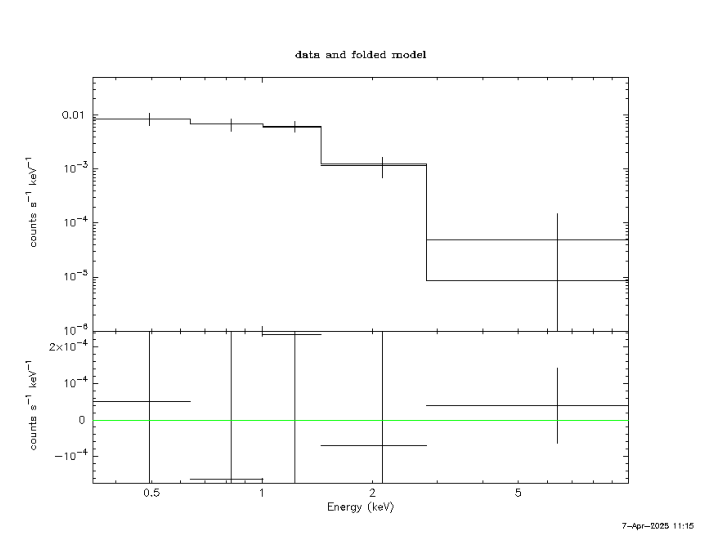

In [18]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_Spectrum_bremsspowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** (GAIA)

- RA = 53.3748310°
- Dec = -27.2428069°

53.37 -27.24

**Column density :** nH = 2e+20 cm^-2

In [19]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"nH = {nH_bbody*10**22} cm^-2")
print()
print(color.BOLD+"bremss (Best fit)"+color.END)
print(f"nH = {nH_bremss*10**22} cm^-2")
print()
print(color.BOLD+"apec"+color.END)
print(f"nH = {nH_apec*10**22} cm^-2")
print()
print(color.BOLD+"powerlaw (Second best fit)"+color.END)
print(f"nH = {nH_powerlaw*10**22} cm^-2")
print()
print(color.BOLD+"bbody+powerlaw"+color.END)
print(f"nH = {nH_bbodypowerlaw*10**22} cm^-2")
print()
print(color.BOLD+"bremss+powerlaw"+color.END)
print(f"nH = {nH_bremsspowerlaw*10**22} cm^-2")

The different models give a column density of :

bbody
nH = 32125614.15501127 cm^-2

bremss (Best fit)
nH = 7.584405114501599e+20 cm^-2

apec
nH = 8.541413889610915e+21 cm^-2

powerlaw (Second best fit)
nH = 2.248113714942615e+21 cm^-2

bbody+powerlaw
nH = 2.1486759626274513e+21 cm^-2

bremss+powerlaw
nH = 3.6593172584949204e+21 cm^-2


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Bremsstrahlung`` with Chi-squared = 1.1526 using 5 bins: **3.0605e-14 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Powerlaw`` with Chi-squared = 1.1882 using 3 bins: **3.2879e-14 ergs/cm^2/s**.

In [20]:
Flux_bremss = 3.0605e-14 # ergs/cm^2/s
Flux_pow = 3.2879e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux [0.2-12.0] keV : "+color.END)
print(f"Bremsstrahlung : F_x-ray = {Flux_bremss} ergs/cm^2/s")
print(f"Powerlaw : F_x-ray = {Flux_pow} ergs/cm^2/s")

X-ray flux [0.2-12.0] keV : 
Bremsstrahlung : F_x-ray = 3.0605e-14 ergs/cm^2/s
Powerlaw : F_x-ray = 3.2879e-14 ergs/cm^2/s


### Optical flux

In [21]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 17.5984

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 9.590236099191845e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [22]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Bremsstrahlung : F_x-ray/F_optical = {Flux_bremss/F}")
print(f"Powerlaw : F_x-ray/F_optical = {Flux_pow/F}")

X-ray Flux / Optical Flux ratio : 
Bremsstrahlung : F_x-ray/F_optical = 0.03191266584414855
Powerlaw : F_x-ray/F_optical = 0.03428382748863781


### Maccacaro et al. paper: log(fx/fv)
https://articles.adsabs.harvard.edu/pdf/1988ApJ...326..680M
- fx : X-ray flux in the 0.3-3.5 keV band in ergs/cm^2/s.
- mv : Visual magnitude.

In [23]:
def logfxfv(fx,mv):
    return np.log10(fx)+(mv/2.5)+5.37

fx_bremss = 2.9e-14 # ergs/cm^2/s
fx_pow = 2.8515e-14 # ergs/cm^2/s

logfxfv_bremss = logfxfv(fx_bremss,G)
logfxfv_pow = logfxfv(fx_pow,G)

print(color.BOLD+"X-ray flux [0.3-3.5] keV : "+color.END)
print(f"Bremsstrahlung : fx = {fx_bremss} ergs/cm^2/s")
print(f"Powerlaw : fx = {fx_pow} ergs/cm^2/s")
print()
print(color.BOLD+"log(fx/fv) : "+color.END)
print(f"Bremsstrahlung : log(fx/fv) = {logfxfv_bremss}")
print(f"Powerlaw : log(fx/fv) = {logfxfv_pow}")

X-ray flux [0.3-3.5] keV : 
Bremsstrahlung : fx = 2.9e-14 ergs/cm^2/s
Powerlaw : fx = 2.8515e-14 ergs/cm^2/s

log(fx/fv) : 
Bremsstrahlung : log(fx/fv) = -1.128242002101044
Powerlaw : log(fx/fv) = -1.1355666240788755


## Luminosity

In [24]:
"""GAIA"""

P_mas = 1.9836 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_bremss = 4*np.pi*Flux_bremss*(d_cm)**2 # erg/s
Luminosity_pow = 4*np.pi*Flux_pow*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity :"+color.END)
print(f"Bremsstrahlung : L_x-ray = {Luminosity_bremss} erg/s")
print(f"Powerlaw : L_x-ray = {Luminosity_pow} erg/s")

(GAIA)
Distance : d = 1.5556059689453518e+21 cm
Luminosity :
Bremsstrahlung : L_x-ray = 9.306822896956917e+29 erg/s
Powerlaw : L_x-ray = 9.998334586801061e+29 erg/s
